## Machine Learning Final Project

### Problem Statement

#### Create a machine learning model that will help the company in determining the salary of newly hired employees using the given data.

### Q.1 Your views about the problem statement?

##### By leveraging the power of machine learning, companies can make data-driven decisions to determine employee salaries more efficiently and accurately. This approach takes into account a range of important factors, including skills, experience, qualifications, and past performance, enabling companies to predict fair and competitive salary packages that align with current market trends.

### Q.2 What will be your approach to solving this task?

 ##### My strategy for tackling this task involves the following steps:

##### Data Upload and Analysis: Import and analyze the dataset within a Jupyter Notebook environment.
##### Data Pre-processing: Conduct processes such as cleaning the data, transforming it, and managing missing values, outliers, and categorical variables.
##### Data Splitting: Divide the dataset into training and testing subsets at a ratio of 80:20.
##### Model Training and Testing: Apply various regression techniques to train and test the models using the prepared dataset.
##### Model Selection: Identify the model and regression technique that yields the highest accuracy.
##### Performance Enhancement: Implement strategies to improve the performance of the chosen model.

## Uploading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('ML case study.csv')

In [4]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [5]:
df.shape

(1589, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


## Data Pre-Processing

In [7]:
# Performing EDD for numerical variables
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


#### No missing values or visible outliers present in the data.

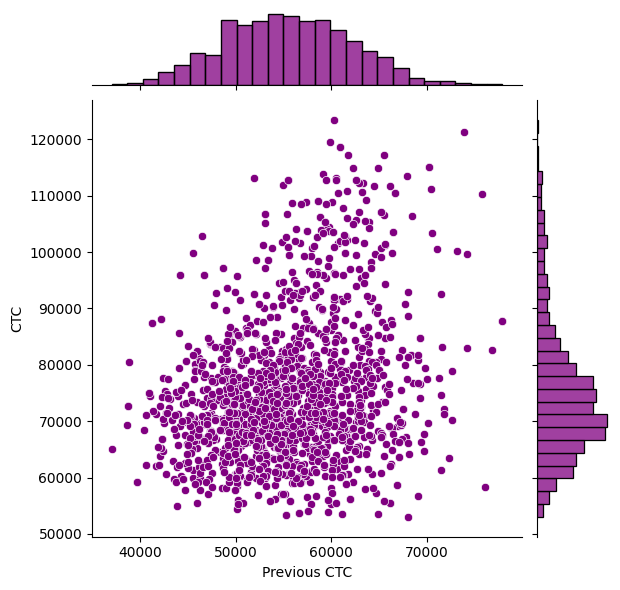

In [8]:
# Joint plot for previous ctc column
sns.jointplot(data=df, x='Previous CTC',y='CTC', color = 'purple')

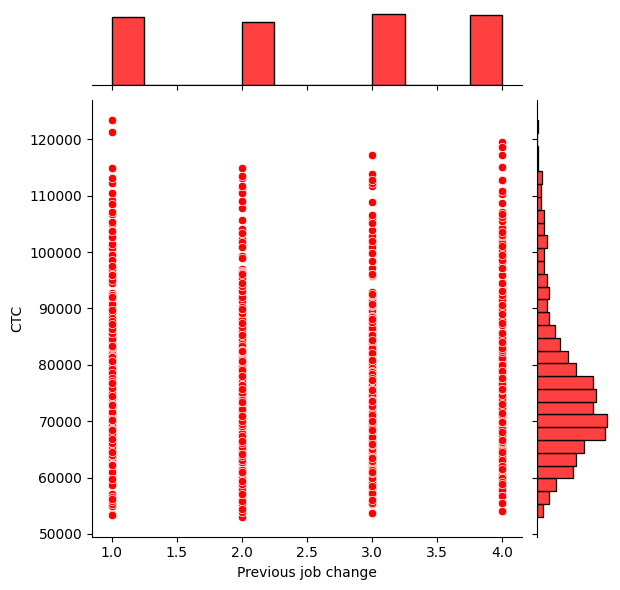

In [9]:
# Joint plot for Previous job change column
sns.jointplot(data=df, x='Previous job change',y='CTC', color = 'Red')

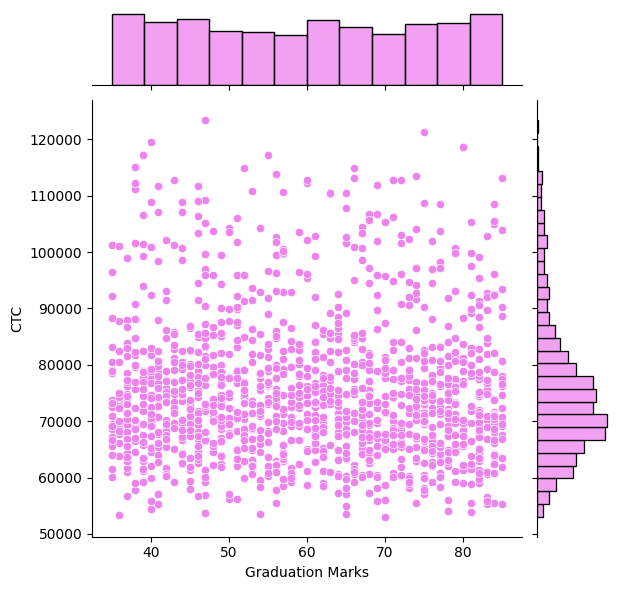

In [10]:
# Joint plot for Graduation Marks column
sns.jointplot(data=df, x='Graduation Marks',y='CTC', color = 'Violet')

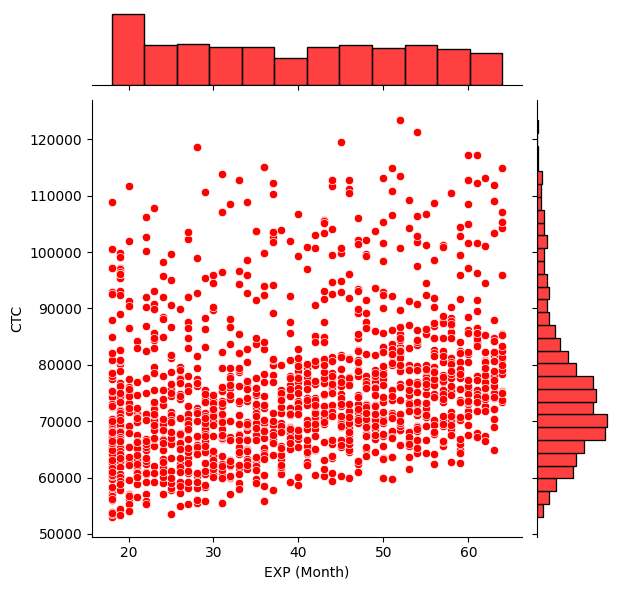

In [11]:
# Joint plot for EXP (Month) column
sns.jointplot(data=df, x='EXP (Month)',y='CTC', color = 'red')

<Axes: xlabel='Role', ylabel='count'>

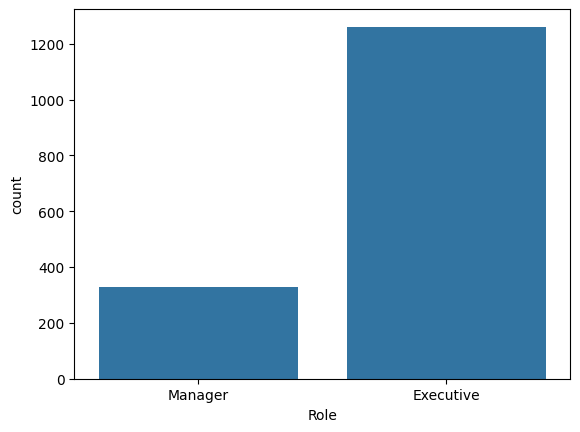

In [12]:
# for categorical veriables
sns.countplot(data=df, x='Role')

#### 1. No Missing Values

 #### 2. No outliers present

#### 3. Need to convert categorical variables into numerical variables for analysis

In [13]:
# Converting categorical variables into numerical variables for analysis
# uploading Colleges data sets
colleges = pd.read_csv('Colleges - Colleges.csv', header = 0)

In [14]:
# Creating college tier lists
Tier1 = colleges["Tier 1"].tolist()
Tier2 = colleges["Tier 2"].tolist()
Tier3 = colleges["Tier 3"].tolist()

In [15]:
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [16]:
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [17]:
Tier3

['Ramaiah Institute of Technology, Bengaluru',
 'TIET/Thapar University',
 'Manipal Main Campus',
 'VIT Vellore',
 'SRM Main Campus',
 'KIIT, Bhubaneswar',
 'Amity University',
 'BMS College, Bangalore',
 'PES University, Bangalore',
 'USIT, Delhi',
 'MAIT, Delhi',
 'MSIT, Delhi',
 'Dayanand College of Engineering, Bangalore',
 'Heritage Institute of Technology, Kolkata',
 'IEM, Kolkata',
 'Techno India, Kolkata',
 'Jaypee, Noida',
 'Amrita University, Coimbatore',
 'Cummins College of Engineering for Women, Pune',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [18]:
# Removing Nan values from the lists.
Tier1 = [item for item in Tier1 if not(pd.isnull(item)) == True]
Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad']

In [19]:
# Removing Nan values from the lists
Tier2 = [item for item in Tier2 if not(pd.isnull(item)) == True]
Tier2

['IIIT Bangalore',
 'IIIT Delhi',
 'IGDTUW',
 'NIT Calicut',
 'IIITM Gwalior',
 'IIIT Lucknow',
 'MNNIT Allahabad',
 'Punjab Engineering College',
 'DAIICT',
 'MNIT Jaipur',
 'NIT Durgapur',
 'VNIT Nagpur',
 'LNMIIT',
 'BIT Mesra',
 'SVNIT Surat',
 'NIT Jalandhar',
 'NIT Jamshedpur',
 'NIT Kurukshetra',
 'NIT Patna',
 'NIT Raipur',
 'NIT Bhopal',
 'NIT Rourkela',
 'NIT Silchar',
 'NIT Sikkim',
 'IIIT Jabalpur',
 'Jalpaiguri Government Engineering College',
 'IIEST/BESU Shibpur',
 'R.V. College of Engineering']

In [20]:
# Converting college column into numerical values using tier list
for item in df.College:
    if item in Tier1:
        df["College"].replace(item,1,inplace = True)
    elif item in Tier2:
        df["College"].replace(item,2,inplace = True)  
    elif item in Tier3:
        df["College"].replace(item,3,inplace = True)  

C:\Users\nikhi\AppData\Local\Temp\ipykernel_15448\2793215506.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["College"].replace(item,2,inplace = True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_15448\2793215506.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [21]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


In [22]:
# Uploading Cities dataset
cities = pd.read_csv('cities - cities.csv', header = 0)

In [23]:
cities

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


In [24]:
# Creating city lists
Metro = cities["Metrio City"].tolist()
Non_metro = cities["non-metro cities"].tolist()

In [25]:
Metro

['Mumbai',
 'Delhi',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Ahmedabad',
 'Pune',
 'Surat']

In [26]:
# Removing Nan values from the list
Non_metro = [item for item in Non_metro if not(pd.isnull(item)) == True]
Non_metro

['Dehradun',
 'Durgapur',
 'Asansol',
 'Rourkela',
 'Kozhikode',
 'Rajpur Sonarpur',
 'Kolhapur',
 'Ajmer']

In [27]:
# Converting college column into numerical values using tier list
for item in df.City:
    if item in Metro:
        df["City"].replace(item,0,inplace = True)
    elif item in Non_metro:
        df["City"].replace(item,1,inplace = True)  

C:\Users\nikhi\AppData\Local\Temp\ipykernel_15448\1779240563.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["City"].replace(item,1,inplace = True)
C:\Users\nikhi\AppData\Local\Temp\ipykernel_15448\1779240563.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [28]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,1,Manager,55523.0,3,66,19,71406.58
1,2,1,Executive,57081.0,1,84,18,68005.87
2,3,1,Executive,60347.0,2,52,28,76764.02
3,3,1,Executive,49010.0,2,81,33,82092.39
4,1,1,Executive,57879.0,4,74,32,73878.10


In [29]:
# Creating dummy variable for role column using getdummies function
df = pd.get_dummies(df, columns = ['Role'], drop_first = True)

In [30]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,1,55523.0,3,66,19,71406.58,True
1,2,1,57081.0,1,84,18,68005.87,False
2,3,1,60347.0,2,52,28,76764.02,False
3,3,1,49010.0,2,81,33,82092.39,False
4,1,1,57879.0,4,74,32,73878.10,False


In [31]:
# Creating Correlatinal matrix
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,0.014946,1.000000,-0.004644,-0.051670,0.018616,0.023613,0.020365,0.048671
Previous CTC,0.041979,-0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,-0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


In [32]:
# Creating X and Y variables for regression model
X = df.loc[:, df.columns != 'CTC']
Y = df['CTC']

In [33]:
X['Role_Manager'] = X['Role_Manager'].astype(int)

C:\Users\nikhi\AppData\Local\Temp\ipykernel_15448\4262995556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Role_Manager'] = X['Role_Manager'].astype(int)


In [34]:
print(X.isnull().sum())

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
Role_Manager           0
dtype: int64


In [35]:
X = X.dropna()
Y = Y[X.index] 

In [36]:
X_cons = sm.add_constant(X)

In [37]:
lm_multi = sm.OLS(Y, X_cons).fit()

In [38]:
print(lm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          4.70e-257
Time:                        18:38:24   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.88e+04   2

## Performing Test Train Split

In [39]:
# importing train test split function from sklearn library
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0) #spliting data into 80:20 ratio

In [40]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [41]:
# importing linear Regression from sklearn library
from sklearn.linear_model import LinearRegression

## Performing linear regression on train data

In [42]:
lm_a=LinearRegression()
lm_a.fit(X_train,y_train)

LinearRegression()

## Predicting Values

In [43]:
y_test_a=lm_a.predict(X_test)

In [44]:
y_train_a=lm_a.predict(X_train)

## Model Performance

In [45]:
# Importing r2 score 
from sklearn.metrics import r2_score

In [46]:
r2_score(y_test,y_test_a)

0.5355989894789973

## Ridge Shrinkage Method

In [47]:
from sklearn import preprocessing # To standardize data
# Import the model we are using
from sklearn.linear_model import Ridge
# Creating scaler objects
scaler=preprocessing.StandardScaler().fit(X_train)
X_train_s=scaler.transform(X_train)
X_test_s=scaler.transform(X_test)

## Training the model

In [48]:
lm_r=Ridge(alpha=0.5)
lm_r.fit(X_train_s,y_train) 

Ridge(alpha=0.5)

## Model Performance

In [49]:
r2_score(y_test,lm_r.predict(X_test_s))

0.5355848845406525

## Lasso Shrinkage Method

In [50]:
# Import the model we are using
from sklearn.linear_model import Lasso

## Training the model

In [51]:
lm_l=Ridge(alpha=0.4)
lm_l.fit(X_train_s,y_train)

Ridge(alpha=0.4)

## Model Performance

In [52]:
r2_score(y_test,lm_l.predict(X_test_s))

0.5355877164258337

## Simple Decision tree method
## Training Decision Tree

In [53]:
# Importing tree
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [54]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

## Predicting Values

In [55]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [56]:
y_test_pred

array([ 73242.49487805,  67137.92249315,  67137.92249315,  77249.90582677,
        73242.49487805,  87264.44514286,  70080.03361607,  73242.49487805,
        67137.92249315,  73242.49487805,  70080.03361607,  77249.90582677,
        95311.75026316,  77249.90582677,  73242.49487805, 104985.9661039 ,
        67137.92249315,  67137.92249315,  67137.92249315,  77249.90582677,
       104985.9661039 , 104985.9661039 ,  67137.92249315,  67137.92249315,
        70080.03361607,  67137.92249315,  77249.90582677, 104985.9661039 ,
        77249.90582677,  73242.49487805,  67137.92249315,  67137.92249315,
        77180.13443038,  77249.90582677, 104985.9661039 ,  77249.90582677,
        67137.92249315,  77180.13443038,  67137.92249315,  67137.92249315,
        67137.92249315,  77180.13443038,  73242.49487805,  67137.92249315,
        77249.90582677,  70080.03361607,  77180.13443038,  67137.92249315,
        67137.92249315,  73242.49487805,  95311.75026316,  77249.90582677,
       104985.9661039 ,  

## Model Performance

In [57]:
# importing mean_squared_error matrics
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

np.float64(60424631.02613472)

In [58]:
r2_score(y_train, y_train_pred)

0.6137194061789908

In [59]:
r2_score(y_test, y_test_pred)

0.5927831611924914

### Plotting Decision Tree

In [60]:
# Creating a dot file
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names = X_train.columns, filled=True)

In [61]:
from IPython.display import Image

In [62]:
import pydotplus

## Random Forest Regressor

### Training Model

In [63]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000,n_jobs = -1, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

### Predicting Values

In [64]:
y_train_pred2 = rf.predict(X_train)
y_test_pred2 = rf.predict(X_test)

## Model Performance

In [65]:
mean_squared_error(y_test, y_test_pred2)

np.float64(50426355.28312304)

In [66]:
r2_score(y_train, y_train_pred2)

0.950702606475054

In [68]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred2)

0.6601640648480558

## Ada Boosting

In [69]:
# Import the model we are using
from sklearn.ensemble import AdaBoostRegressor
# Instantiate model with 5000 decision trees
ada_reg = AdaBoostRegressor(n_estimators = 5000, random_state = 42)
# Train the model on training data
ada_reg.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=5000, random_state=42)

#### Predicting Values

In [70]:
y_train_pred3 = ada_reg.predict(X_train)
y_test_pred3 = ada_reg.predict(X_test)

### Model Performance

In [71]:
mean_squared_error(y_test, y_test_pred3)

np.float64(60707106.85940631)

In [72]:
r2_score(y_train, y_train_pred3)

0.6199642435301522

In [73]:
r2_score(y_test, y_test_pred3)

0.5908794852591683

## Gradient Boosting

### Training Data

In [74]:
# Import the model we are using
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate model with 1000 decision trees
gbr_reg = GradientBoostingRegressor(n_estimators = 1000, max_depth = 4, min_samples_split = 5, learning_rate = 0.02, loss = "squared_error")
# Train the model on training data
gbr_reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, max_depth=4, min_samples_split=5,
                          n_estimators=1000)

### Predicting Values

In [75]:
y_train_pred4 = gbr_reg.predict(X_train)
y_test_pred4 = gbr_reg.predict(X_test)

### Model Performance

In [76]:
mean_squared_error(y_test, y_test_pred4)

np.float64(54172829.47512212)

In [77]:
r2_score(y_train, y_train_pred4)

0.8692840608075864

In [78]:
r2_score(y_test, y_test_pred4)

0.6349156297110681

### Q.3 What ML model options did you have available to perform this task?

### The options for machine learning models include:

#### Standard Linear Regression
#### Ridge Regression
#### Lasso Regression
#### Simple Decision Tree
#### Random Forest Regressor
#### AdaBoost
#### Gradient Boosting
#### Feature Selection Technique

### Q.4 Which model’s performance is best and what could be the possible reason for that?

##### The Random Forest Regressor emerged as the most effective model for this dataset, achieving the highest R² score of 0.66 on the test set. This model operates by creating a variety of decision trees that yield uncorrelated results. It achieves this through the use of different subsets of variables for each split, leading to a significant reduction in variance. This characteristic likely contributes to the superior R² score observed with this model.

### Q.5 What steps can you take to improve this selected model’s performance even further?

##### To further enhance the performance of this Random Forest model, we can implement Grid Search. This involves providing diverse hyperparameter values such as n_estimators, max_features, and min_samples_split in a dictionary format to the model, allowing us to identify the configuration that yields the best R² score. Additionally, utilizing feature selection methods will enable us to focus only on the variables that are most relevant to the dependent variable. Finally, acquiring more accurate and pertinent data for the model will also contribute to improved performance.